# 1. Viết chương trình xử lý điểm ảnh
## 1.1. Biến đổi cường độ ảnh

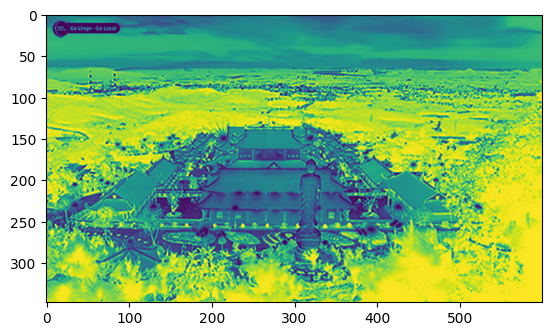

In [2]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale imagej
img = Image.open('pagoda.jpg').convert('L')

#convert image 1 into an ndarray
im_1 = np.asarray(img)

#inversion operation
im_2 = 255 - im_1

#convert image 2 from ndarray to image
new_img = Image.fromarray(im_2)

img.show()

plt.imshow(new_img)
plt.show()

## 1.2. Thay đổi chất lượng ảnh với Power law (Gamma-Correction)

C:\Users\ACER\AppData\Local\Temp\ipykernel_242052\2294279005.py:20: RuntimeWarning: divide by zero encountered in log
  b2 = np.log(b3) * gamma


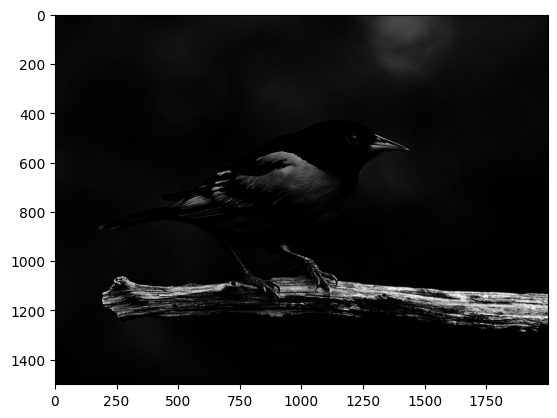

In [7]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

gamma = 5

b1 = im_1.astype(float)

b2 = np.max(b1)

b3 = b1/b2

b2 = np.log(b3) * gamma

c = np.exp(b2) * 255.0

c1 = c.astype(int)

d = Image.fromarray(c1)

img.show()
d.show()
plt.imshow(d)
plt.show()

## 1.3. Thay đổi cường độ điểm ảnh với Log Transformation

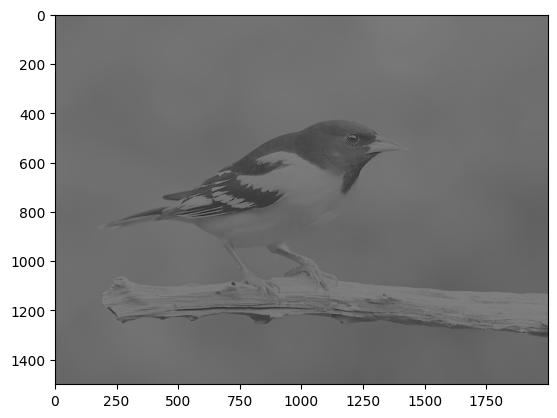

In [10]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

img = Image.open('bird.png').convert('L')

im_1 = np.asarray(img)

b1 = im_1.astype(float)

b2 = np.max(b1)

c = (128.0 * np.log(1 + b1))/np.log(1 + b2)

c1 = c.astype(int)

d = Image.fromarray(c1)

#img.show()
#d.show()
#plt.imshow(d)
plt.imshow(d, cmap = 'gray')
plt.show()

## 1.4. Histogram equalization

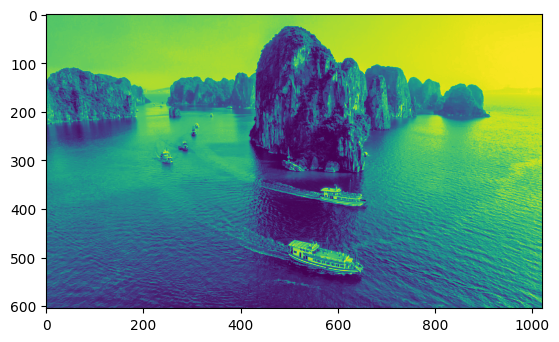

In [12]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('quang_ninh.jpg').convert('L')

#convert image 1 into an ndarray
iml = np.asarray(img)

#convert 2D ndarray from 1D array
b1 = iml.flatten()

#histogram and bin are computed
hist, bins = np.histogram(iml, 256, [0, 255])
#cumulative distribution function is computed
cdf = hist.cumsum()
#places where cdf=0 is masked or ignored and
#rest is stored in cdf_m
cdf_m = np.ma.masked_equal(cdf, 0)
#histogram equalization is performed
num_cdf_m = (cdf_m - cdf_m.min()) * 255
den_cdf_m = (cdf_m.max() - cdf_m.min())
cdf_m = num_cdf_m/den_cdf_m
#the masked places in cdf_m are now 0
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
#cdf values are assigned in the flattened array
im2 = cdf[b1]

#im2 is 1D so we use reshape command to
#make it into 2D
im3 = np.reshape(im2, iml.shape)
#converting im3 to an image
im4 = Image.fromarray(im3)

img.show()
im4.show()
plt.imshow(im4)
plt.show()

## 1.5. Thay đổi ảnh với Constrast Stretching

0 255


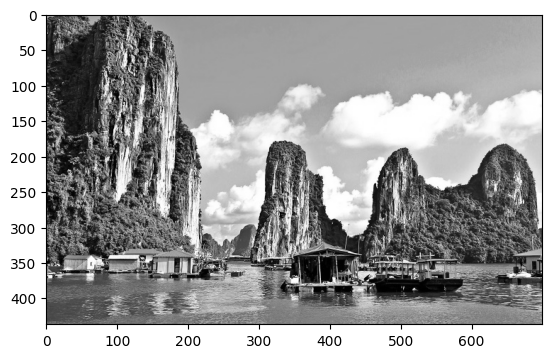

In [13]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('ha-long-bay-in-vietnam.jpg').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
# finding the maximum and minimum pixel values
b = iml.max()
a = iml.min()
print(a, b)
# converting iml to float
c = iml.astype(float)
# contrast stretching transformation
im2 = 255 * (c - a)/(b - a)
#im2 is converted from ndarray to image
im3 = Image.fromarray(im2)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

## 1.6. Biến đổi Fourier
### 1.6.1. Biến đổi ảnh với Fast Fourier


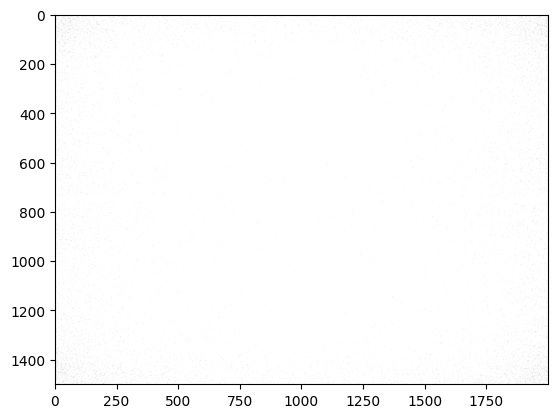

In [1]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#open a grayscale image
img = Image.open('bird.png').convert('L')
#convert image 1 into an ndarray
iml = np.asarray(img)
# performing FFT
c = abs(scipy.fftpack.fft2(iml))
# shifting the Fourier frequency image
d = scipy.fftpack.fftshift(c)
d = d.astype(float)
#im2 is converted from ndarray to image
im3 = Image.fromarray(d)
img.show()
im3.show()
plt.imshow(im3)
plt.show()

### 1.6.2. Lọc ảnh trong miền tần suất

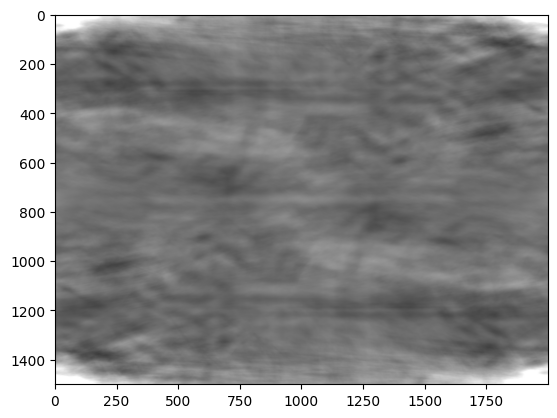

In [22]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#mở một ảnh xám
img = Image.open('bird.png').convert('L')
#chuyển đổi ảnh 1 thành một ndarray
iml = np.asarray(img)
#thực hiện FFT
c = abs(scipy.fftpack.fft2(iml))
#dịch chuyển ảnh tần số Fourier
d = scipy.fftpack.fftshift(c)
#khởi tạo các biến cho hàm tích chập
M = d.shape[0]
N = d.shape[1]
#H được định nghĩa và các giá trị trong H được khởi tạo thành 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d0 = 30.0 #bán kính cắt
t1 = 1 #thứ tự của BLPF (Bộ lọc thông thấp Butterworth)
t2 = 2 * t1

#định nghĩa hàm tích chập cho BLPF
for i in range(M):
    for j in range(N):
        r1 = (i - center1)**2 + (j - center2)**2
        #khoảng cách Euclid từ gốc được tính toán
        r = math.sqrt(r1)
        #sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d0:
            H[i, j] = 1/(1 + (r/d0)**t1)
#H được chuyển đổi từ ndarray sang ảnh
H = H.astype(float)
Image.fromarray(H)
#thực hiện phép tích chập
con = d * H
#tính toán biên độ của nghịch đảo FFT
e = abs(scipy.fftpack.ifft2(con))
#e được chuyển đổi từ ndarray sang ảnh
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

Butterworth highpass Filter

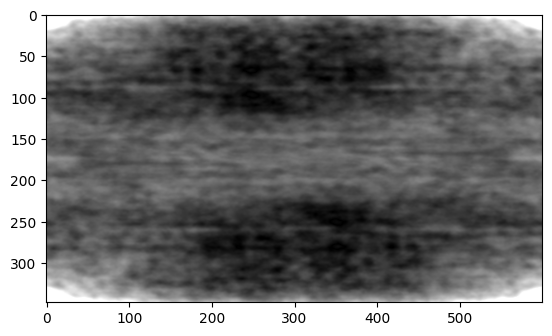

In [25]:
from PIL import Image
import math
import scipy
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

#mở một ảnh xám
img = Image.open('pagoda.jpg').convert('L')
#chuyển đổi ảnh 1 thành một ndarray
iml = np.asarray(img)
#thực hiện FFT
c = abs(scipy.fftpack.fft2(iml))
#dịch chuyển ảnh tần số Fourier
d = scipy.fftpack.fftshift(c)
#khởi tạo các biến cho hàm tích chập
M = d.shape[0]
N = d.shape[1]
#H được định nghĩa và các giá trị trong H được khởi tạo thành 1
H = np.ones((M, N))

center1 = M/2
center2 = N/2
d0 = 30.0 #bán kính cắt
t1 = 1 #thứ tự của BLPF (Bộ lọc thông thấp Butterworth)
t2 = 2 * t1

#định nghĩa hàm tích chập cho BLPF
for i in range(M):
    for j in range(N):
        r1 = (i - center1)**2 + (j - center2)**2
        #khoảng cách Euclid từ gốc được tính toán
        r = math.sqrt(r1)
        #sử dụng bán kính cắt để loại bỏ tần số cao
        if r > d0:
            H[i, j] = 1/(1 + (r/d0)**t2) # Lưu ý: ở đây là **t2, không phải **t1 như ở ảnh trước
#H được chuyển đổi từ ndarray sang ảnh
H = H.astype(float)
Image.fromarray(H)
#thực hiện phép tích chập
con = d * H
#tính toán biên độ của nghịch đảo FFT
e = abs(scipy.fftpack.ifft2(con))
#e được chuyển đổi từ ndarray sang ảnh
e = e.astype(float)
im3 = Image.fromarray(e)

img.show()
im3.show()
plt.imshow(im3)
plt.show()

# BÀI TẬP 1

Chọn phương pháp xử lý ảnh:
I - Image Inverse
G - Gamma Correction
L - Log Transformation
H - Histogram Equalization
C - Contrast Stretching


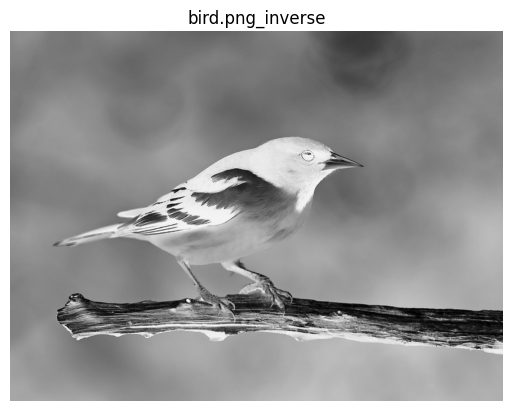

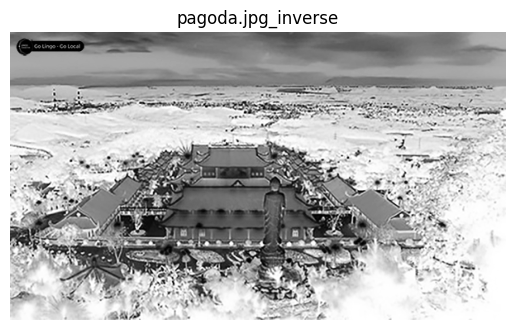

Đã xử lý xong tất cả ảnh.


In [2]:
from PIL import Image
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt

# Thư mục chứa ảnh gốc
input_dir = 'exercise'
output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Lấy danh sách các ảnh trong thư mục
image_files = [f for f in os.listdir(input_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Hàm: Image Inverse
def image_inverse(img_arr):
    return 255 - img_arr

# Hàm: Gamma Correction
def gamma_correction(img_arr, gamma=2.2):
    img_float = img_arr.astype(float) / 255.0
    corrected = np.power(img_float, gamma) * 255.0
    return corrected.astype(np.uint8)

# Hàm: Log Transformation
def log_transform(img_arr):
    img_float = img_arr.astype(float)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return log_img.astype(np.uint8)

# Hàm: Histogram Equalization
def histogram_equalization(img_arr):
    hist, bins = np.histogram(img_arr.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    return cdf[img_arr]

# Hàm: Contrast Stretching
def contrast_stretching(img_arr):
    a = img_arr.min()
    b = img_arr.max()
    stretched = 255 * (img_arr - a) / (b - a)
    return stretched.astype(np.uint8)

# Hiển thị menu
print("Chọn phương pháp xử lý ảnh:")
print("I - Image Inverse")
print("G - Gamma Correction")
print("L - Log Transformation")
print("H - Histogram Equalization")
print("C - Contrast Stretching")

choice = input("Nhập lựa chọn (I/G/L/H/C): ").upper()

# Duyệt qua từng ảnh và áp dụng xử lý
for file in image_files:
    path = os.path.join(input_dir, file)
    img = Image.open(path).convert('L')
    img_arr = np.asarray(img)

    if choice == 'I':
        result = image_inverse(img_arr)
        suffix = '_inverse'
    elif choice == 'G':
        result = gamma_correction(img_arr)
        suffix = '_gamma'
    elif choice == 'L':
        result = log_transform(img_arr)
        suffix = '_log'
    elif choice == 'H':
        result = histogram_equalization(img_arr)
        suffix = '_hist_eq'
    elif choice == 'C':
        result = contrast_stretching(img_arr)
        suffix = '_contrast'
    else:
        print("Lựa chọn không hợp lệ.")
        break

    # Lưu ảnh đã xử lý
    result_img = Image.fromarray(result)
    output_path = os.path.join(output_dir, os.path.splitext(file)[0] + suffix + '.png')
    result_img.save(output_path)

    # Hiển thị ảnh
    img.show()
    result_img.show()
    plt.imshow(result_img, cmap='gray')
    plt.title(file + suffix)
    plt.axis('off')
    plt.show()

print("Đã xử lý xong tất cả ảnh.")
